<a href="https://colab.research.google.com/github/VadymBoyko/DS-HW01/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Значення параметрів для дослідження
neuron_values = [128, 256, 512]
epoch_values = [10, 20, 30]
batch_size_values = [64, 128, 256]

# Створення списків для збереження точностей
accuracies = []

# Внутрішній цикл для дослідження різних параметрів
for neurons in neuron_values:
    for epochs in epoch_values:
        for batch_size in batch_size_values:
            model = Sequential()
            model.add(Flatten(input_shape=(28, 28)))
            model.add(Dense(neurons, activation='relu'))
            model.add(Dense(num_classes, activation='softmax'))

            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Навчання моделі
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

            # Оцінка точності на тестовому наборі
            _, accuracy = model.evaluate(x_test, y_test, verbose=0)

            # Збереження точності для даної комбінації параметрів
            accuracies.append((neurons, epochs, batch_size, accuracy))

# Виведення результатів
for neurons, epochs, batch_size, accuracy in accuracies:
    print(f'Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, Accuracy: {accuracy:.4f}')

Epoch 1/10
750/750 [==============================] - 9s 4ms/step - loss: 0.5433 - accuracy: 0.8114 - val_loss: 0.4163 - val_accuracy: 0.8537
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3969 - accuracy: 0.8588 - val_loss: 0.3916 - val_accuracy: 0.8591
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3557 - accuracy: 0.8714 - val_loss: 0.3674 - val_accuracy: 0.8710
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3293 - accuracy: 0.8810 - val_loss: 0.3503 - val_accuracy: 0.8751
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3109 - accuracy: 0.8860 - val_loss: 0.3598 - val_accuracy: 0.8709
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2947 - accuracy: 0.8930 - val_loss: 0.3311 - val_accuracy: 0.8818
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2812 - accuracy: 0.8964 - val_loss: 0.3203 - val_accuracy: 0.8827
Epoch 

**ВИСНОВКИ**

При побудові моделі з двома шарами, найкращій результат передбачення у моделі, у якій:

кількість епох - 30

розмір batch_size -256

кількість нейронів у прихованому шарі - 512

Дана модель надає accuracy = .8955

Хоча при інших параметрах значення не набагато гірші 0.87-0.88

У наступному прикладі спробуємо додади додатковий шар




In [7]:
# Значення параметрів для дослідження
neuron_values = [128, 256, 512]
epoch_values = [10, 20, 30]
batch_size_values = [64, 128, 256]
dropout_rates = [0.2, 0.4, 0.5]

# Створення списку для збереження точностей та наборів параметрів
accuracies = []
param_combinations = []

# Внутрішній цикл для дослідження різних параметрів
for neurons in neuron_values:
    for epochs in epoch_values:
        for batch_size in batch_size_values:
            for dropout_rate in dropout_rates:
                model = Sequential()
                model.add(Flatten(input_shape=(28, 28)))
                model.add(Dense(neurons, activation='relu'))
                model.add(Dropout(dropout_rate))  # Додатковий Dropout шар
                model.add(Dense(neurons, activation='relu'))  # Додатковий Dense шар
                model.add(Dense(num_classes, activation='softmax'))

                model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

                # Навчання моделі
                history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)

                # Оцінка точності на тестовому наборі
                _, accuracy = model.evaluate(x_test, y_test, verbose=0)

                # Збереження точності та набору параметрів
                accuracies.append(accuracy)
                param_combinations.append((neurons, epochs, batch_size, dropout_rate))


In [8]:
# Знаходження набору параметрів з найкращою точністю
best_param_index = np.argmax(accuracies)
best_params = param_combinations[best_param_index]

print(f'Best Parameters: Neurons={best_params[0]}, Epochs={best_params[1]}, Batch Size={best_params[2]}, Dropout={best_params[3]}')
print(f'Best Accuracy: {accuracies[best_param_index]:.4f}')

Best Parameters: Neurons=256, Epochs=30, Batch Size=256, Dropout=0.2
Best Accuracy: 0.8940


**ВИСНОВКИ**

При побудові моделі з додатковими шарами, найкращій результат передбачення у моделі, у якій:

кількість епох - 30

розмір batch_size -256

кількість нейронів у прихованому шарі - 256

Dropout = 0.2

Дана модель надає accuracy = .8940

Далі спробую у ручному режимі ще подивитися на те, як краще побудувати мережу

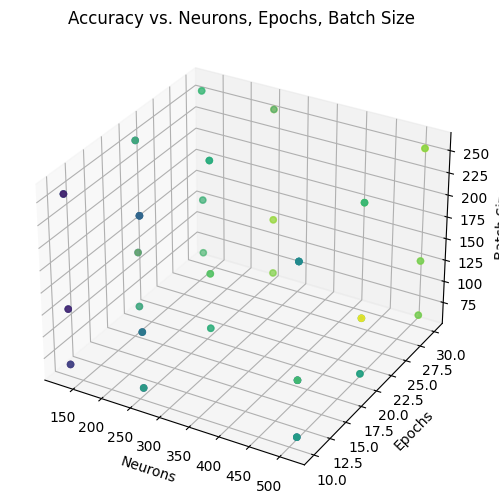

In [10]:
# Побудова графіка
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Побудова графіка
neuron_values = [param[0] for param in param_combinations]
epoch_values = [param[1] for param in param_combinations]
batch_size_values = [param[2] for param in param_combinations]
ax.scatter(neuron_values, epoch_values, batch_size_values, c=accuracies, cmap='viridis')

ax.set_xlabel('Neurons')
ax.set_ylabel('Epochs')
ax.set_zlabel('Batch Size')
ax.set_title('Accuracy vs. Neurons, Epochs, Batch Size')
plt.show()

In [12]:
# Наспростіша модель
model_1 = Sequential()
model_1.add(Flatten(input_shape=(28, 28)))
model_1.add(Dense(784, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

# Навчання моделі
history_1 = model_1.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=0)

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_122 (Flatten)       (None, 784)               0         
                                                                 
 dense_338 (Dense)           (None, 784)               615440    
                                                                 
 dense_339 (Dense)           (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Модель з додатковими шарами
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28, 28)))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))  # Додаємо Dropout
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

# Навчання моделі
history_2 = model_2.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)


Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_123 (Flatten)       (None, 784)               0         
                                                                 
 dense_340 (Dense)           (None, 128)               100480    
                                                                 
 dropout_94 (Dropout)        (None, 128)               0         
                                                                 
 dense_341 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.7151 - accuracy: 0.7529 - val_loss: 0.4625 - val_accuracy: 0.8353
Epoch 2/20
375/375 [================

In [14]:
# Ще більше додактових шарів
model_3 = Sequential()
model_3.add(Flatten(input_shape=(28, 28)))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

# Навчання моделі
history_3 = model_3.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)


Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_124 (Flatten)       (None, 784)               0         
                                                                 
 dense_342 (Dense)           (None, 256)               200960    
                                                                 
 dropout_95 (Dropout)        (None, 256)               0         
                                                                 
 dense_343 (Dense)           (None, 128)               32896     
                                                                 
 dropout_96 (Dropout)        (None, 128)               0         
                                                                 
 dense_344 (Dense)           (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-

In [15]:
# Більше епох
model_4 = Sequential()
model_4.add(Flatten(input_shape=(28, 28)))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.summary()

# Навчання моделі
history_4 = model_4.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1)


Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_125 (Flatten)       (None, 784)               0         
                                                                 
 dense_345 (Dense)           (None, 256)               200960    
                                                                 
 dropout_97 (Dropout)        (None, 256)               0         
                                                                 
 dense_346 (Dense)           (None, 128)               32896     
                                                                 
 dropout_98 (Dropout)        (None, 128)               0         
                                                                 
 dense_347 (Dense)           (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-

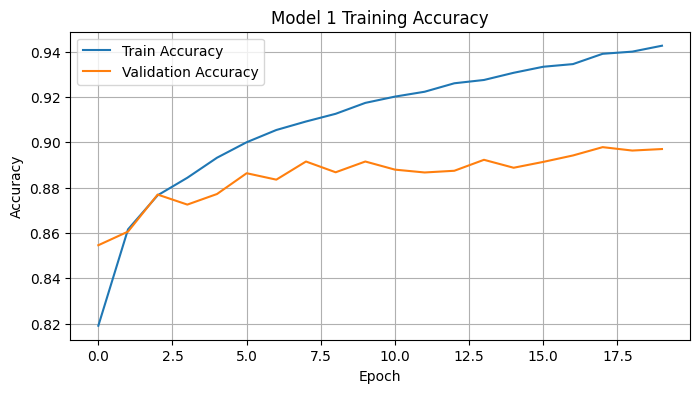

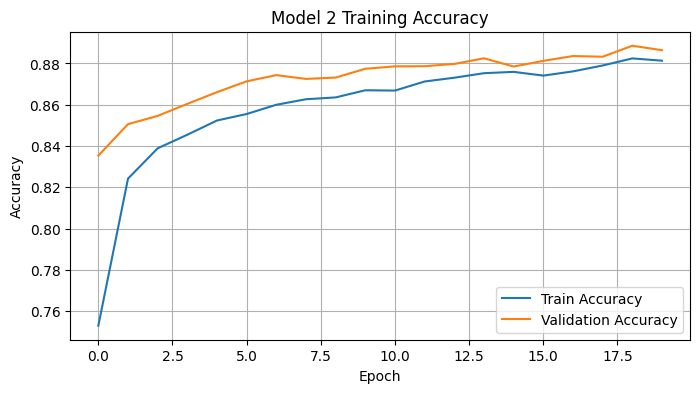

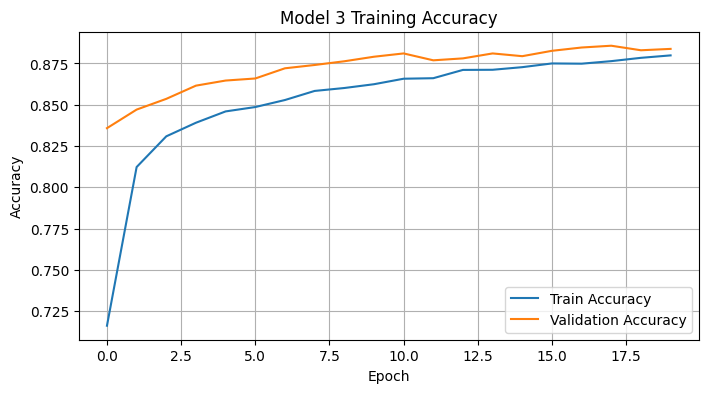

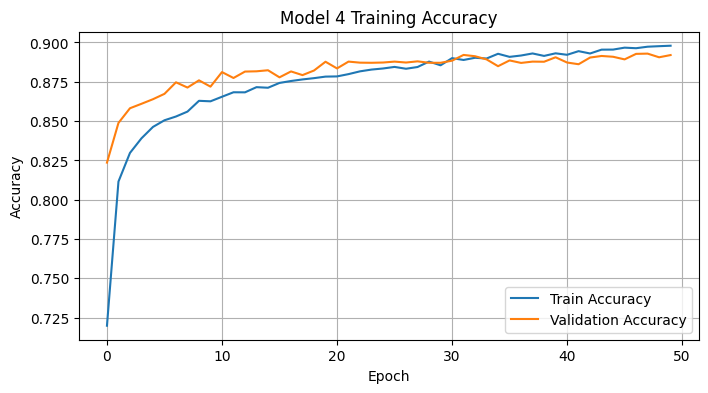

In [16]:
def plot_training_history(history, model_name):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Порівняння результатів навчання моделей
plot_training_history(history_1, 'Model 1')
plot_training_history(history_2, 'Model 2')
plot_training_history(history_3, 'Model 3')
plot_training_history(history_4, 'Model 4')


**ВИСНОВКИ**

найпростіша модель (1) показала найгірші результати
Інші модели показали кращі результати. Хоча вже після 10-15 епох точність зростає не так швидко.


**ПІДСУМКИ**

Додавання нових шарів, зміна розміру batch_size покращує прогнозованність моделі. Кількість епох так само впливає, але оскільки кількість епох дуже сповільнує навчання моделі, то треба дослідним шлязом обрати оптимальну кількість, як на мій погляд з усіма прикладами і методами аналізу моделі, оптимальна кількість епох є 20-25